<div align="center">

# <span style="font-size: 2em;">Welcome Non-Parametric Modelling!</span>

</div>

<p align="center">
  <img src="KNN.png" alt="Header" />
</p>

<div align="center">

# <span style="font-size: em;">The Gist!</span>

</div>


# Introduction to K-Nearest Neighbors (KNN)

KNN is an example of a non-parametric modelling algorithm.
---

## What is K-Nearest Neighbors?

**KNN** is a **non-parametric** machine learning algorithm, meaning it doesn’t make strong assumptions about the underlying data distribution.

At its core, KNN works like this:
- For a **new input** (sample), it looks at the **K closest examples** from the training data.
- It **“votes” or averages** their labels:
  - For classification → majority class among neighbors
  - For regression → average of neighbor values
- The predicted label or value is assigned to the new input.

This simplicity makes KNN straightforward.

---

## Why Is It Called Non-Parametric?

A **non-parametric algorithm** doesn’t explicitly learn fixed parameters during training (like weights in DNNs or coefficients in linear regression).  
Instead, KNN **memorizes the training data** and makes predictions “on the fly” by comparing new samples to stored examples.

This gives KNN:
- Flexibility to adapt to complex patterns  
- No need for a training phase (besides storing the data)  
- But… it can be **slow at prediction time** if the dataset is large

---

## How Does KNN Work?

Here’s the typical flow:

1. **Choose \( K \)** → Number of neighbors to look at (common choices: 3, 5, 7)
2. **Compute distance** → Measure distance between the test sample and all training samples (commonly Euclidean distance)
3. **Select nearest neighbors** → Pick the \( K \) samples with smallest distances
4. **Vote or average** → Assign label by majority vote (classification) or average (regression)

---

## Why KNN Works Well on Simple Problems

- It’s intuitive and interpretable
- It handles **multi-class problems** naturally
- With enough data and the right \( K \), it can adapt to complex, non-linear patterns
- Works well when decision boundaries are irregular or hard to model parametrically

---

## This Implementation

I consider KNN one of the most beginner-friendly models to implement.

For this example, I use the **Cancer data set** from that classifies a tumor as either Benign or Cancerous. I use `Scikit-learn` for my implimentation.
- **Input**: All the other variables of my data including (id                           
diagnosis                    
radius_mean                  
texture_mean                 
perimeter_mean               
area_mean                    
smoothness_mean              
compactness_mean)
- **Output**: Diagnosis (Benign(B), malignant (M) )
- **Steps**:
  - Load the data  
  - Encode the features with **LabelEncoder**  
  - Use **KNeighborsClassifier** from `scikit-learn`  
  - Tune \( K \) by testing multiple values  
  - Report accuracy



---

## Summary

In the next steps, I’ll show **scikit-learn** implementations.




In [171]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

try:
    df = pd.read_csv("data.csv")
    print("Loaded data.csv")
except Exception as e:
    print(f"Error loading CSV: {e}")
    exit()

    


Loaded data.csv


In [172]:
df.head()
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [173]:
df["diagnosis"].unique()

df =df.drop(columns = ['Unnamed: 32'])

## Scatter Plot of Two Features Colored by Diagnosis

In this plot, we visualize the relationship between two selected features from the dataset:

- **x-axis** → `radius_mean`  
- **y-axis** → `texture_mean`

We use a scatter plot where each point represents a data sample, and the color indicates the diagnosis:

- Malignant (`M`) → one color (e.g., red)
- Benign (`B`) → another color (e.g., blue)

The line:
```python
c=(df['diagnosis'] == 'M')


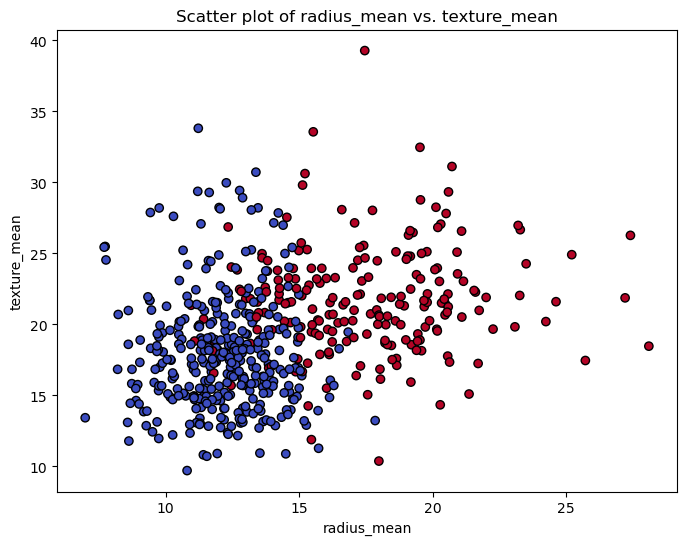

In [174]:
import matplotlib.pyplot as plt

# Example: pick two features
plt.figure(figsize=(8, 6))
plt.scatter(
    X['radius_mean'], 
    X['texture_mean'], 
    c=(df['diagnosis'] == 'M'),  # encode as 1/0 for color
    cmap='coolwarm', 
    edgecolor='k'
)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('Scatter plot of radius_mean vs. texture_mean')
plt.show()


## Pairplot

A **pairplot** shows scatter plots between all pairs of selected features, organized in a grid.  
It allows you to quickly visualize relationships between features and how they differ across diagnosis classes.

We use `seaborn.pairplot` with the `hue='diagnosis'` argument to color-code samples by their diagnosis (malignant or benign).  
This plot is especially useful for spotting feature pairs that help separate the two classes.

---

## Boxplot

A **boxplot** shows the distribution of a single feature across different diagnosis classes.

For example:
- x-axis → diagnosis (`M` or `B`)
- y-axis → a feature like `radius_mean`

The boxplot displays:
- the median  
- the interquartile range (IQR)  
- potential outliers

This helps assess whether a particular feature shows different distributions across classes and might be useful for classification.

---



/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


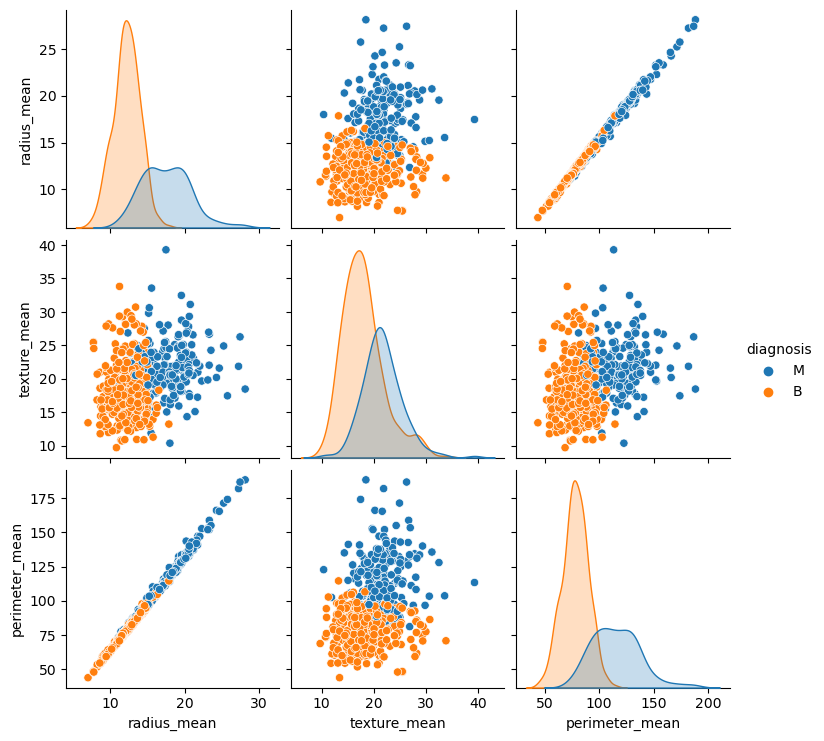

In [175]:
import seaborn as sns
import pandas as pd

df_plot = X.copy()
df_plot['diagnosis'] = df['diagnosis']

sns.pairplot(df_plot, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean'])
plt.show()


In [176]:
X =df.drop(columns = ["diagnosis"])
y = df["diagnosis"]

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.preprocessing import StandardScaler
"""
Preprocesses the dataset by encoding labels, splitting data, selecting features, scaling, 
and training a K-Nearest Neighbors (KNN) classifier.

Steps:
1. Encodes categorical target labels `y` into integer values using LabelEncoder.
2. Splits the feature matrix `X` and encoded labels `y` into training and validation sets 
   using an 80/20 split (train_test_split).
3. Selects the 'radius_mean' and 'texture_mean' columns from the training and validation sets.
4. Scales the selected features using StandardScaler for consistent distance measurements.
5. Trains a KNeighborsClassifier (n_neighbors=5) on the training data.
6. Predicts on the validation set and computes the accuracy score.

Arguments:
- X: DataFrame of shape (n_samples, n_features)
    Full feature matrix.
- y: array-like of shape (n_samples,)
    Target labels (categorical or string).

Returns:
- X_train_plot: ndarray of shape (~80% samples, 2)
    Unscaled training subset with selected features.
- X_val_plot: ndarray of shape (~20% samples, 2)
    Unscaled validation subset with selected features.
- X_train_plot_scaled: ndarray of shape (~80% samples, 2)
    Scaled training subset.
- X_val_plot_scaled: ndarray of shape (~20% samples, 2)
    Scaled validation subset.
- y_train: ndarray of shape (~80% samples,)
    Encoded training labels.
- y_val: ndarray of shape (~20% samples,)
    Encoded validation labels.
- model_KNN: fitted KNeighborsClassifier object
    The trained KNN model.
- acc: float
    Accuracy score on the validation set.

Notes:
- The current code trains the KNN model on **unscaled features**, which may reduce performance. 
  It is recommended to train and predict on the **scaled features** for better accuracy.
"""

# Convert categorical labels to numerical values
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
model_encoder = LabelEncoder()
y = model_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)




X_train_plot = X_train[['radius_mean', 'texture_mean']].values
X_val_plot = X_val[['radius_mean', 'texture_mean']].values

scaler = StandardScaler()
X_train_plot_scaled = scaler.fit_transform(X_train_plot)
X_val_plot_scaled = scaler.transform(X_val_plot)



model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train_plot_scaled, y_train)


y_pred = model_KNN.predict(X_val_plot_scaled)
acc = accuracy_score(y_val, y_pred)

print(f"Accuracy = {acc:.4f}")

Accuracy = 0.9035


## Decision Boundary Plot

The **decision boundary plot**below visualizes the regions in feature space where the classifier assigns different classes.
I:
- Select two features (to work in 2D)
- Train the KNN classifier on these features
- Generate a mesh grid over the feature space
- Use `model.predict()` to classify each grid point
- Overlay the true data points using `scatter`

This plot helps in understanding how the model separates the classes and whether its predictions align well with the actual data distribution.

As shown the model achieves an amazing accuracy of 90%.


Text(0.5, 1.0, 'KNN Decision Boundary (Accuracy: 90.35%)')

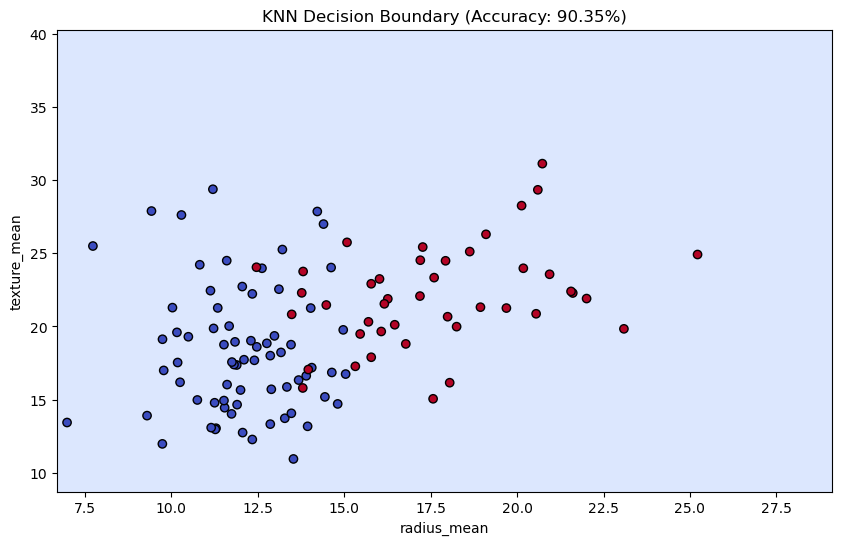

In [178]:
x_min, x_max = X_train_plot[:, 0].min() - 1, X_train_plot[:, 0].max() + 1
y_min, y_max = X_train_plot[:, 1].min() - 1, X_train_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]


Z = model_KNN.predict(grid)
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_val_plot[:, 0], X_val_plot[:, 1], c=y_val, cmap='coolwarm', edgecolor='k')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title(f'KNN Decision Boundary (Accuracy: {acc:.2%})')  

## KNN-Based Recommendation System

This section implements a K-Nearest Neighbors (KNN)–based recommendation system that suggests a diagnosis for a new patient by finding the most similar patients in the dataset. This is similar to a TikTok/movie recommendation algorithm that can predict the best movie possible based on the most watched movies.

### How it works:
1. **New patient input:**  
   A new patient’s data (e.g., `radius_mean`, `texture_mean`) is entered into the system.

2. **Scaling:**  
   The input is scaled using the same `StandardScaler` that was fit on the training data to ensure consistent feature ranges.

3. **Finding nearest neighbors:**  
   The KNN model uses `.kneighbors()` to find the `k` most similar patients (nearest neighbors) in the training set based on Euclidean distance.

4. **Retrieving neighbor diagnoses:**  
   The diagnoses of these neighbors are retrieved:
   - The labels were encoded as numbers (e.g., 0, 1), but they can be decoded back into readable names.

5. **Majority vote recommendation:**  
   The system counts the most frequent diagnosis among the nearest neighbors and recommends that as the predicted or suggested diagnosis for the new patient.



### Why this matters:
This KNN-based recommendation system provides a simple but intuitive way to support clinical decisions by leveraging similarity to past cases. It’s a flexible method that works even without a complex predictive model.




In [179]:
"""
Generates a diagnosis recommendation for a new patient using a trained KNN model 
by finding the most similar patients in the training set.

Steps:
1. Defines a new patient input as a NumPy array with selected feature values.
2. Scales the new patient’s features using the previously fitted StandardScaler.
3. Finds the k-nearest neighbors to the new patient using the trained KNN model.
4. Retrieves the diagnoses of the nearest neighbors from the training labels.
   - Uses .iloc if y_train is a pandas Series.
5. Prints the list of diagnoses for the nearest neighbors.
6. Computes the majority diagnosis (most common among neighbors) using Counter
   and prints the recommended diagnosis.

Arguments:
- new_patient: ndarray of shape (1, n_features)
    Feature values for the new patient.

- scaler: fitted StandardScaler object
    Used to scale the new patient’s features consistently.

- model_KNN: fitted KNeighborsClassifier object
    The trained KNN model used to identify nearest neighbors.

- y_train: array-like or pandas Series of shape (n_train_samples,)
    Training labels corresponding to the KNN training data.

Returns:
- None (results are printed to standard output)

Outputs:
- List of diagnoses of the nearest neighbors.
- Suggested diagnosis based on majority vote.

Notes:
- Ensure that the KNN model and scaler were both trained using 
  the same set of features and preprocessing steps.
- The new_patient input must match the feature order and scaling 
  used during training.
"""

from collections import Counter

new_patient = np.array([[70.0, 20.0]])
new_patient_scaled = scaler.transform(new_patient)

# Find nearest neighbors
distances, indices = model_KNN.kneighbors(new_patient_scaled)


if isinstance(y_train, pd.Series):
    nearest_diagnoses = y_train.iloc[indices[0]].values
else:
    nearest_diagnoses = y_train[indices[0]]

print("\nRecommended based on nearest patients:")
print(nearest_diagnoses)

summary = Counter(nearest_diagnoses).most_common(1)
print(f"Suggested diagnosis (majority among neighbors): {summary[0][0]}")



Recommended based on nearest patients:
[1 1 1 1 1]
Suggested diagnosis (majority among neighbors): 1


## Confusion Matrix

A **confusion matrix** is a table used to evaluate the performance of a classification model.  
It compares the model’s predicted labels with the true labels and shows the counts of:
- **True positives (TP):** correct positive predictions
- **True negatives (TN):** correct negative predictions
- **False positives (FP):** incorrect positive predictions
- **False negatives (FN):** incorrect negative predictions

This helps understand not just overall accuracy but also **which types of errors the model makes**.

---

### Current Results

| True Class → | Predicted B | Predicted M |
|--------------|-------------|-------------|
| B (Benign)  | 66          | 5          |
| M (Malignant)| 6          | 37         |

### Interpretation:
- **True Positives (TP, M→M):** 37  
  Malignant cases correctly predicted as Malignant.

- **True Negatives (TN, B→B):** 66  
  Benign cases correctly predicted as Benign.

- **False Positives (FP, B→M):** 5  
  Benign cases incorrectly predicted as Malignant.

- **False Negatives (FN, M→B):** 6  
  Malignant cases incorrectly predicted as Benign.

### Summary:
- The model performs well, correctly identifying most cases.
- It has low but nonzero **false positive** and **false negative** counts.



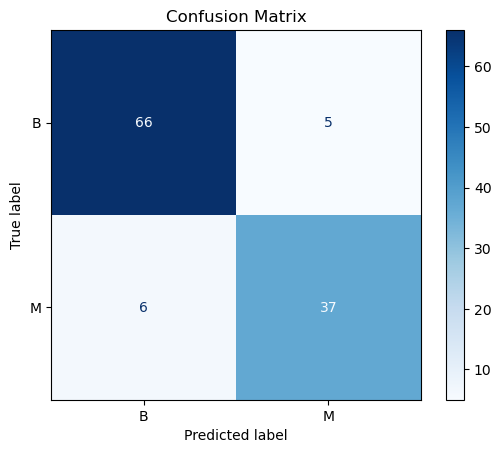

In [180]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model_KNN.predict(X_val_plot_scaled)  # make sure to use scaled features if needed
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
